In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [ ]:
# !pip install pandas-datareader

In [14]:
# start = '2010-01-01'
# end = '2019-12-31'

# df = data.DataReader('AAPL','yahoo',start, end)
# df.head()

import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

apple = yf.Ticker('AAPL')

df = apple.history(period='1d', start=start, end=end)

print(df.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.469953  6.502389  6.438123  6.487535  493729600   
2010-01-05 00:00:00-05:00  6.505420  6.535431  6.464496  6.498751  601904800   
2010-01-06 00:00:00-05:00  6.498750  6.524518  6.388710  6.395379  552160000   
2010-01-07 00:00:00-05:00  6.419023  6.426602  6.337175  6.383555  477131200   
2010-01-08 00:00:00-05:00  6.375069  6.426603  6.337480  6.425997  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [13]:
# !pip install yfinance

In [15]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.469953,6.502389,6.438123,6.487535,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.505420,6.535431,6.464496,6.498751,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.498750,6.524518,6.388710,6.395379,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.419023,6.426602,6.337175,6.383555,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.375069,6.426603,6.337480,6.425997,447610800,0.0,0.0


In [16]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.469953,6.502389,6.438123,6.487535,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.505420,6.535431,6.464496,6.498751,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.498750,6.524518,6.388710,6.395379,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.419023,6.426602,6.337175,6.383555,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.375069,6.426603,6.337480,6.425997,447610800,0.0,0.0


In [18]:
df = df.drop(['Date','Dividends','Stock Splits'],axis=1)

In [19]:
df.head()

,Open,High,Low,Close,Volume
0,6.469953,6.502389,6.438123,6.487535,493729600
1,6.505420,6.535431,6.464496,6.498751,601904800
2,6.498750,6.524518,6.388710,6.395379,552160000
3,6.419023,6.426602,6.337175,6.383555,477131200
4,6.375069,6.426603,6.337480,6.425997,447610800


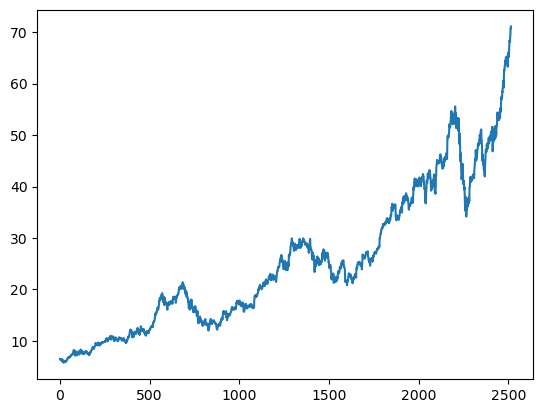

In [20]:
plt.plot(df.Close)

In [21]:
m100 = df.Close.rolling(100).mean()
m100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    57.632165
2511    57.831245
2512    58.069950
2513    58.299521
2514    58.528345
Name: Close, Length: 2515, dtype: float64

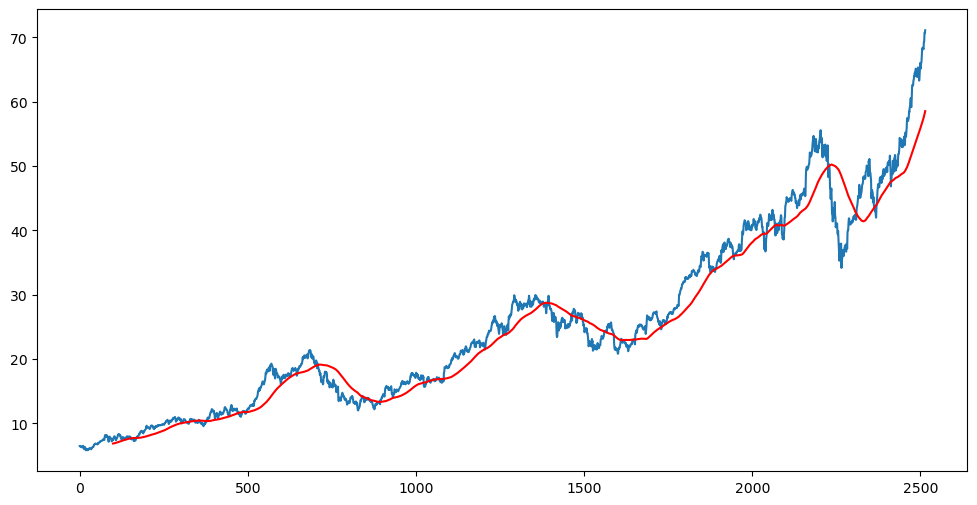

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(m100,'r')

In [23]:
m200 = df.Close.rolling(200).mean()
m200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    52.546792
2511    52.675162
2512    52.809444
2513    52.941155
2514    53.072079
Name: Close, Length: 2515, dtype: float64

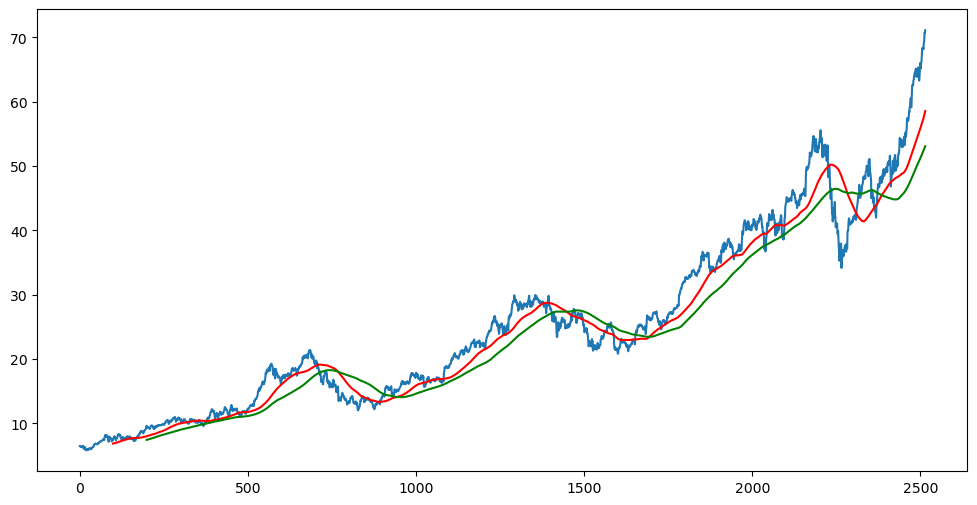

In [24]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(m100,'r')
plt.plot(m200,'g')

In [25]:
#Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [26]:
data_training.head()

,Close
0,6.487535
1,6.498751
2,6.395379
3,6.383555
4,6.425997


In [27]:
data_testing.head()

,Close
1760,27.194427
1761,26.982426
1762,27.059305
1763,27.029024
1764,27.166473


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760003],
       [0.02806505],
       [0.02377922],
       ...,
       [0.88408419],
       [0.89123176],
       [0.88640232]])

In [31]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [42]:
# from keras.layers import Dense,dropout, LSTM
# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential


In [39]:
# !pip install keras
# !pip install tensorflow

In [43]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 23s 299ms/step - loss: 0.0606
Epoch 2/50
52/52 [==============================] - 16s 310ms/step - loss: 0.0125
Epoch 3/50
52/52 [==============================] - 16s 304ms/step - loss: 0.0113
Epoch 4/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0095
Epoch 5/50
52/52 [==============================] - 16s 304ms/step - loss: 0.0085
Epoch 6/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0080
Epoch 7/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0070
Epoch 8/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0078
Epoch 9/50
52/52 [==============================] - 16s 306ms/step - loss: 0.0074
Epoch 10/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0066
Epoch 11/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0078
Epoch 12/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0064
Epoch 13/50
5

In [61]:
model.save('keras_model.h5')

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
data_testing.head()

In [47]:
past_100_days = data_training.tail(100)

In [49]:
# final_df = past_100_days.append(data_testing,ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [50]:
final_df.head()

,Close
0,25.117853
1,25.219837
2,25.032095
3,25.015873
4,25.073809


In [51]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573562],
       [0.02789665],
       [0.02391841],
       [0.02357467],
       [0.02480232],
       [0.03118721],
       [0.03069603],
       [0.02991017],
       [0.0292226 ],
       [0.03059777],
       [0.02642311],
       [0.02809292],
       [0.02406565],
       [0.02180644],
       [0.01871231],
       [0.01812292],
       [0.01409565],
       [0.01458667],
       [0.01768084],
       [0.02259238],
       [0.0224449 ],
       [0.02568647],
       [0.01173815],
       [0.        ],
       [0.01134534],
       [0.02367284],
       [0.04243425],
       [0.06109746],
       [0.05790499],
       [0.05132388],
       [0.05127461],
       [0.05117636],
       [0.05643169],
       [0.04705092],
       [0.04788585],
       [0.04891724],
       [0.05314097],
       [0.04444785],
       [0.04872073],
       [0.04611774],
       [0.04847524],
       [0.04872073],
       [0.05284629],
       [0.0536813 ],
       [0.06345484],
       [0.06468277],
       [0.06979054],
       [0.068

In [52]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [53]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [54]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 118ms/step


In [55]:
y_predicted.shape

(755, 1)

In [56]:
y_predicted

array([[0.12579757],
       [0.1270484 ],
       [0.12820442],
       [0.12923865],
       [0.13013262],
       [0.13088036],
       [0.13149929],
       [0.13202852],
       [0.13251227],
       [0.13299337],
       [0.13350214],
       [0.13405138],
       [0.13465154],
       [0.13530967],
       [0.13602272],
       [0.13678192],
       [0.13757592],
       [0.13838951],
       [0.13922477],
       [0.1400926 ],
       [0.14099914],
       [0.14194041],
       [0.14290178],
       [0.14394253],
       [0.14514911],
       [0.14658988],
       [0.1483192 ],
       [0.15037903],
       [0.15279146],
       [0.15556028],
       [0.15866552],
       [0.1620788 ],
       [0.16577932],
       [0.16974464],
       [0.17394005],
       [0.17832294],
       [0.18284616],
       [0.18745519],
       [0.19207805],
       [0.1966036 ],
       [0.20086907],
       [0.20482206],
       [0.20847836],
       [0.21184854],
       [0.21494472],
       [0.21777536],
       [0.22034933],
       [0.222

In [57]:
y_test

array([0.06973808, 0.06524578, 0.06687485, 0.06623319, 0.06914573,
       0.07556332, 0.08089479, 0.08148718, 0.08464658, 0.0821783 ,
       0.08114166, 0.08588086, 0.08583139, 0.08479463, 0.08588086,
       0.08627565, 0.08573274, 0.09516148, 0.09545777, 0.09550716,
       0.09392728, 0.09254507, 0.12907588, 0.12798989, 0.13070499,
       0.13667812, 0.14279973, 0.14531724, 0.15002735, 0.14853998,
       0.15434085, 0.16291806, 0.16534754, 0.16455416, 0.16638871,
       0.17124755, 0.17328042, 0.17040474, 0.17104927, 0.17238802,
       0.17268557, 0.1865677 , 0.18245272, 0.18651831, 0.18433694,
       0.18522918, 0.18265101, 0.18106425, 0.18334512, 0.18364275,
       0.18260137, 0.18988962, 0.19103001, 0.18755944, 0.19484776,
       0.18681577, 0.19464915, 0.19217024, 0.19078185, 0.19197196,
       0.20644934, 0.20803577, 0.20709382, 0.20575522, 0.20595318,
       0.21125851, 0.20754018, 0.20575522, 0.20416855, 0.20332594,
       0.19569044, 0.19653321, 0.19281497, 0.19668219, 0.19355

In [58]:
scaler.scale_

array([0.02118993])

In [59]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

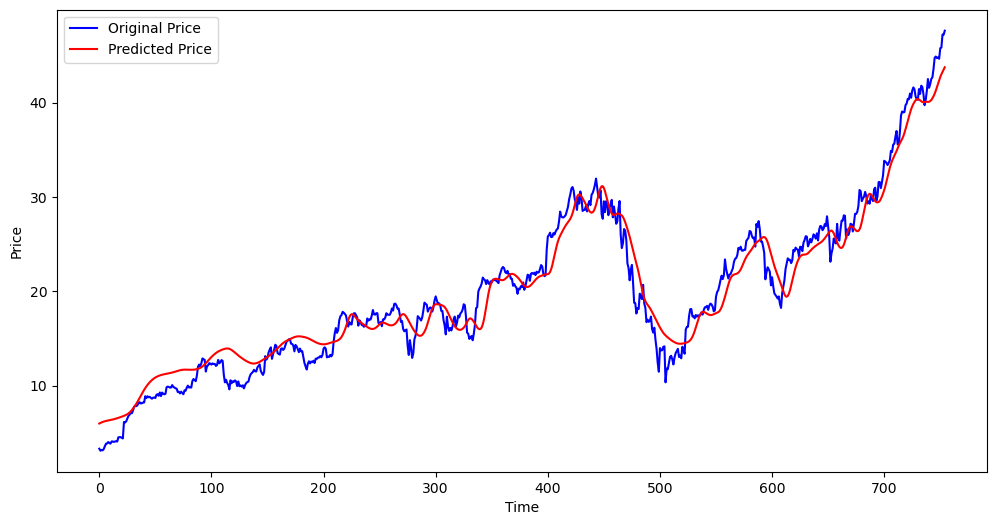

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()